In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
# Definisikan fungsi tujuan
def cost(x1, x2):
    return 1000 * x1 + 200 * x2

def emissions(x1, x2):
    return 0.2 * x1 + 0.1 * x2

In [53]:
# Inisialisasi populasi
def initialize_population(pop_size):
    return np.random.randint(1, 10, size=(pop_size, 2))  # Angka acak antara 1 dan 9

In [54]:
# Evaluasi fungsi tujuan
def evaluate_population(population):
    costs = np.array([cost(ind[0], ind[1]) for ind in population])
    emissions_values = np.array([emissions(ind[0], ind[1]) for ind in population])
    return np.column_stack((costs, emissions_values))

In [56]:
# Non-dominated sorting
def non_dominated_sorting(results):
    num_individuals = results.shape[0]
    fronts = [[]]
    dominated_counts = np.zeros(num_individuals)
    dominates = [[] for _ in range(num_individuals)]

    for p in range(num_individuals):
        for q in range(num_individuals):
            if (results[p][0] < results[q][0] and results[p][1] <= results[q][1]) or \
               (results[p][0] <= results[q][0] and results[p][1] < results[q][1]):
                dominates[p].append(q)
            elif (results[p][0] > results[q][0] and results[p][1] >= results[q][1]) or \
                 (results[p][0] >= results[q][0] and results[p][1] > results[q][1]):
                dominated_counts[p] += 1

        if dominated_counts[p] == 0:
            fronts[0].append(p)

    i = 0
    while fronts[i]:
        next_front = []
        for p in fronts[i]:
            for q in dominates[p]:
                dominated_counts[q] -= 1
                if dominated_counts[q] == 0:
                    next_front.append(q)
        i += 1
        fronts.append(next_front)

    return fronts[:-1]

In [57]:
# Crowding distance calculation
def crowding_distance(front):
    distance = np.zeros(len(front))
    if len(front) == 0:
        return distance

    front_values = results[front]
    sorted_by_cost = np.argsort(front_values[:, 0])
    distance[sorted_by_cost[0]] = distance[sorted_by_cost[-1]] = np.inf

    for i in range(1, len(front) - 1):
        distance[sorted_by_cost[i]] += (front_values[sorted_by_cost[i + 1]][0] - front_values[sorted_by_cost[i - 1]][0])

    sorted_by_emissions = np.argsort(front_values[:, 1])
    for i in range(1, len(front) - 1):
        distance[sorted_by_emissions[i]] += (front_values[sorted_by_emissions[i + 1]][1] - front_values[sorted_by_emissions[i - 1]][1])

    return distance

In [58]:
# Pemilihan individu berdasarkan dominasi dan jarak kerumunan
def select_population(population, fronts):
    selected = []
    for front in fronts:
        if len(selected) + len(front) > len(population):
            distance = crowding_distance(front)
            sorted_front = sorted(zip(front, distance), key=lambda x: x[1], reverse=True)
            selected.extend([x[0] for x in sorted_front[:len(population) - len(selected)]])
            break
        selected.extend(front)
    return population[selected]

In [59]:
# Crossover dan mutasi
def crossover_and_mutate(population):
    new_population = []
    for _ in range(len(population) // 2):
        parent1, parent2 = np.random.choice(len(population), 2, replace=False)
        # Crossover
        child1 = (population[parent1] + population[parent2]) // 2
        child2 = (population[parent1] + population[parent2]) // 2
        # Mutasi
        if np.random.rand() < 0.1:  # 10% kemungkinan mutasi
            child1[0] = np.random.randint(1, 10)
        if np.random.rand() < 0.1:
            child1[1] = np.random.randint(1, 10)
        if np.random.rand() < 0.1:
            child2[0] = np.random.randint(1, 10)
        if np.random.rand() < 0.1:
            child2[1] = np.random.randint(1, 10)
        
        new_population.append(child1)
        new_population.append(child2)

    return np.array(new_population)

/var/folders/pz/kk48lts52c141w_13dd_3y5h0000gn/T/ipykernel_4726/1056895432.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/pz/kk48lts52c141w_13dd_3y5h0000gn/T/ipykernel_4726/1056895432.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/pz/kk48lts52c141w_13dd_3y5h0000gn/T/ipykernel_4726/1056895432.py:58: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/var/folders/pz/kk48lts52c141w_13dd_3y5h0000gn/T/ipykernel_4726/1056895432.py:71: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore a

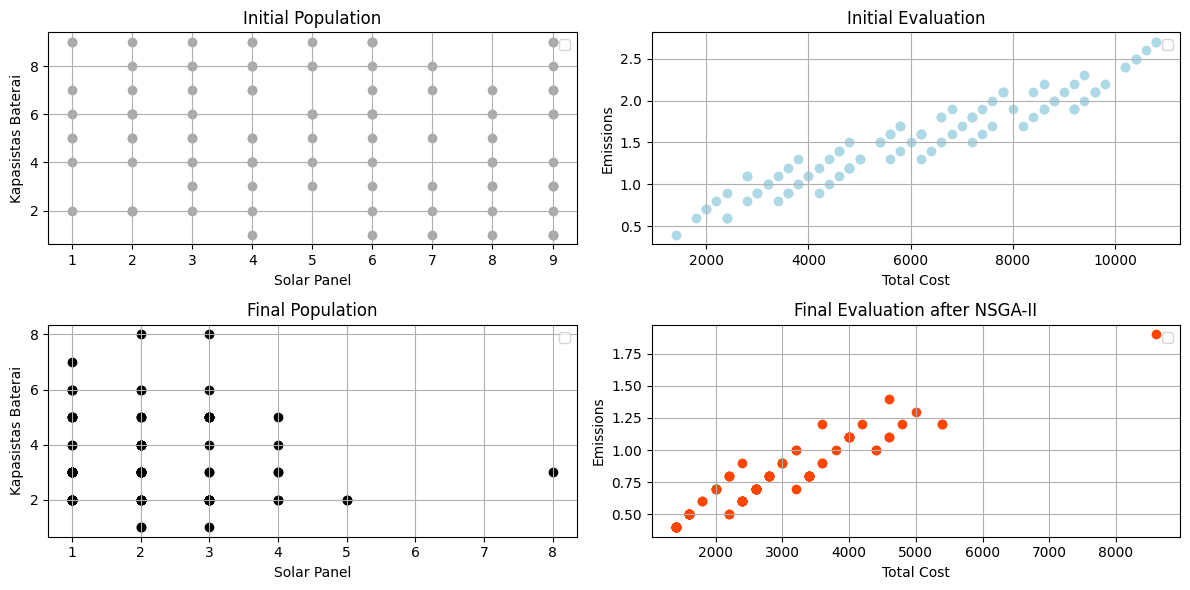

In [62]:
# Parameter NSGA-II
pop_size = 100
num_generations = 500

# Inisialisasi populasi
population = initialize_population(pop_size)
# population = np.array([
#     [5, 10],  # P1
#     [6, 8],   # P2
#     [4, 12],  # P3
#     [7, 5],   # P4
#     [3, 15]   # P5
# ])

# Simpan populasi awal untuk visualisasi
initial_population = population.copy()

# Proses NSGA-II
for generation in range(num_generations):
    results = evaluate_population(population)
    fronts = non_dominated_sorting(results)
    population = select_population(population, fronts)
    population = crossover_and_mutate(population)

# Hasil akhir
final_results = evaluate_population(population)

# Visualisasi hasil
plt.figure(figsize=(12, 6))
# Plot populasi awal
plt.subplot(2, 2, 1)
plt.scatter(initial_population[:, 0], initial_population[:, 1], color='darkgrey')
plt.title('Initial Population')
plt.xlabel('Solar Panel')
plt.ylabel('Kapasistas Baterai')
plt.grid()
plt.legend()

# Plot populasi awal
plt.subplot(2, 2, 2)
initial_results = evaluate_population(initial_population)
i_fronts = non_dominated_sorting(initial_results)
plt.scatter(initial_results[:, 0], initial_results[:, 1], color='lightblue')
plt.title('Initial Evaluation')
plt.xlabel('Total Cost')
plt.ylabel('Emissions')
plt.grid()
plt.legend()

# Plot populasi awal
plt.subplot(2, 2, 3)
initial_results = evaluate_population(initial_population)
plt.scatter(population[:, 0], population[:, 1], color='black')
plt.title('Final Population')
plt.xlabel('Solar Panel')
plt.ylabel('Kapasistas Baterai')
plt.grid()
plt.legend()


# Plot hasil akhir
plt.subplot(2, 2, 4)
for front in fronts:
    plt.scatter(final_results[front, 0], final_results[front, 1], color='orangered')

# plt.scatter(final_results[:, 0], final_results[:, 1], color='grey')
plt.title('Final Evaluation after NSGA-II')
plt.xlabel('Total Cost')
plt.ylabel('Emissions')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()